In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

About Dataset
Content
Columns
• age: age of primary beneficiary
• sex: insurance contractor gender, female, male
• bmi: Body mass index, providing an understanding of body, weights that are relatively high or
low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to
24.9
• children: Number of children covered by health insurance / Number of dependents
• smoker: Smoking
• region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
• charges: Individual medical costs billed by health insurance
Goal:
✓ Predict charges
Task:
1. EDA
2. Preprocessing
3. Implement suitable machine learning algorithm with data

#### [Data set here :](https://drive.google.com/file/d/1TZjVNouyrDdHQBYVwTjCHzOtktwyZtcl/view?usp=sharing)

# EDA

In [2]:
df = pd.read_csv('insurance.csv')
pd.options.display.max_columns= None
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Visualize the data

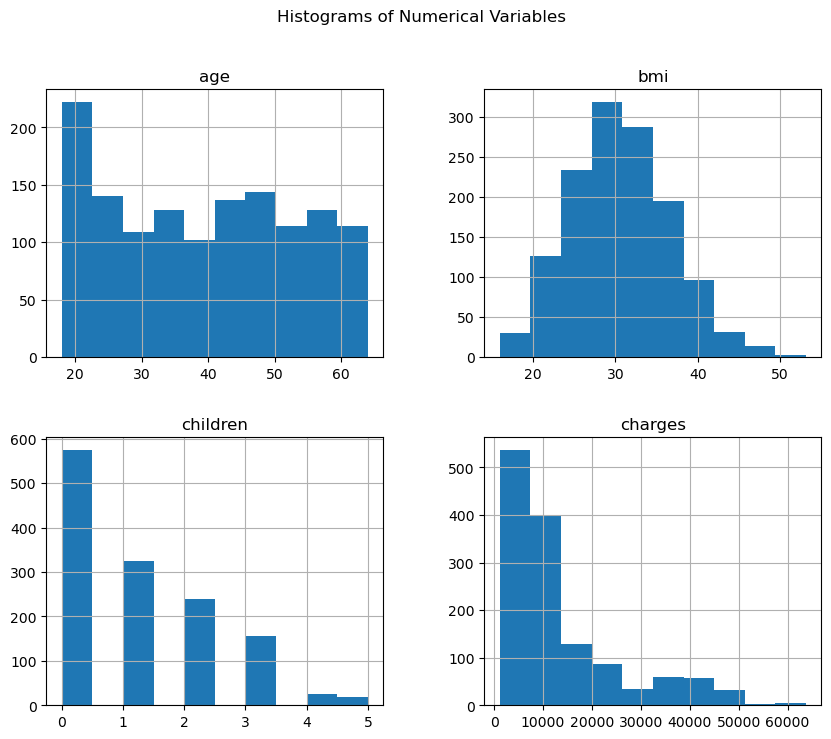

In [6]:
# histogram for numerical columns
numerical_cols = ['age', 'bmi', 'children', 'charges']
df[numerical_cols].hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Variables")
plt.show()

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

<Figure size 800x800 with 0 Axes>

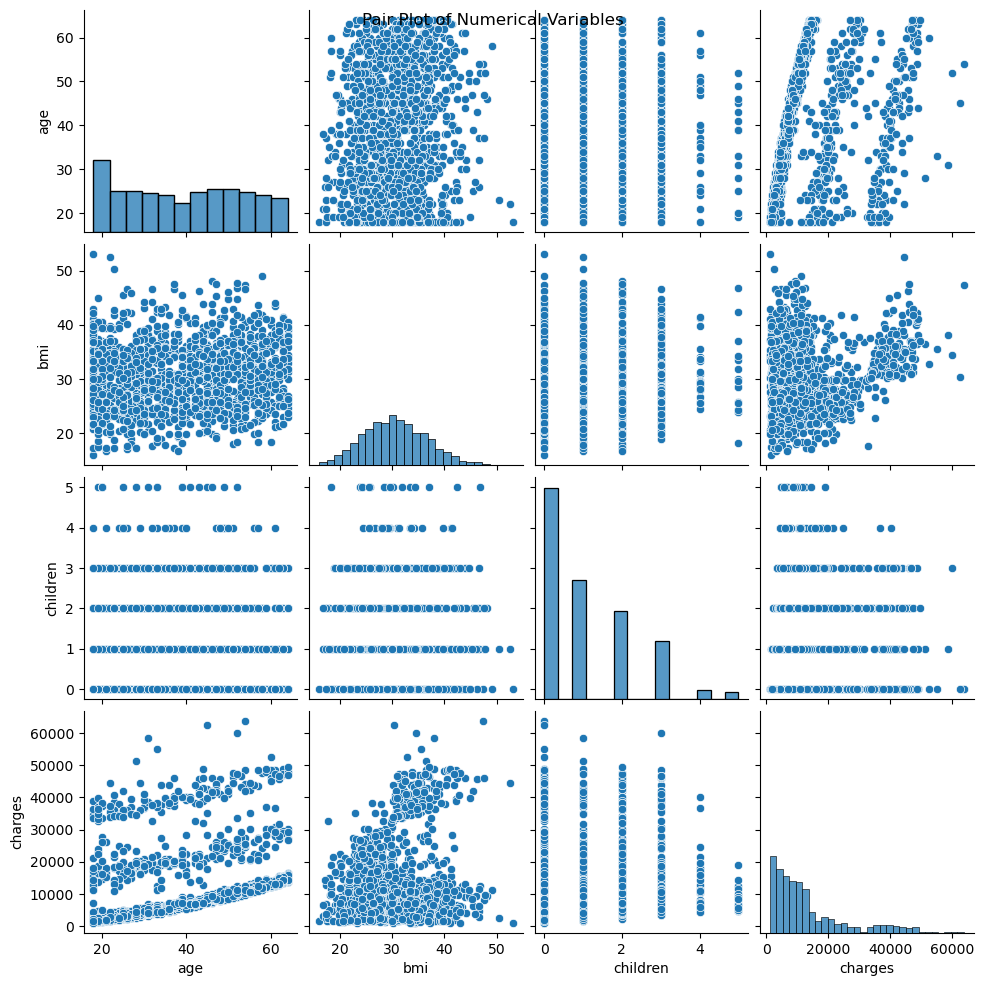

In [7]:
# Pair plot for numerical variables
# for col in numerical_cols:
#     plt.figure(figsize=(8,8))
#     sns.pairplot(pd.DataFrame(df[col]))
#     plt.suptitle("Pair Plot of Numerical Variables")
#     plt.show();
plt.figure(figsize=(8,8))
sns.pairplot(df[numerical_cols])
plt.suptitle("Pair Plot of Numerical Variables")
plt.show()

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


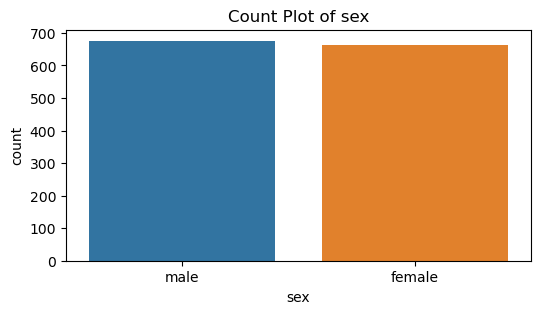

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


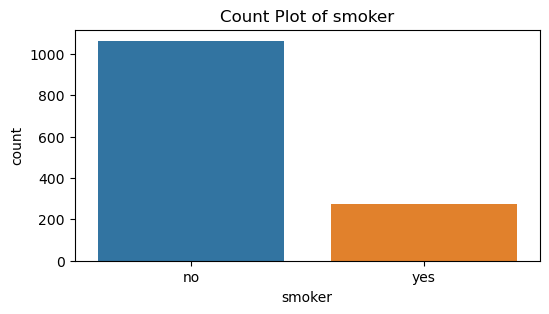

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


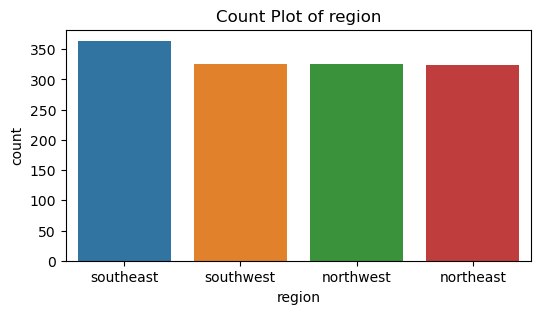

In [8]:
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.show()

In [9]:
# Print unique values for each categorical column
for col in categorical_cols:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'sex': ['female' 'male']
Unique values in column 'smoker': ['yes' 'no']
Unique values in column 'region': ['southwest' 'southeast' 'northwest' 'northeast']


C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


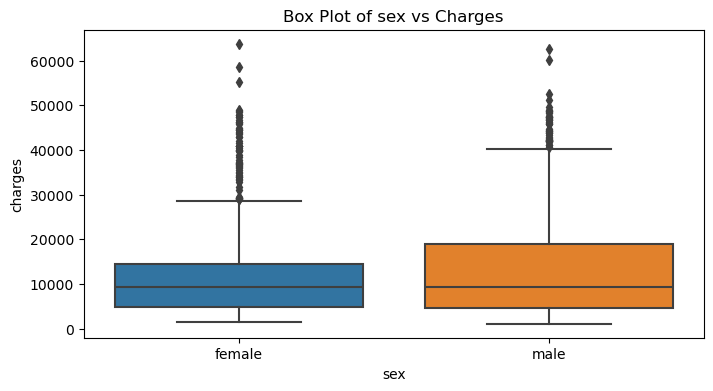

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


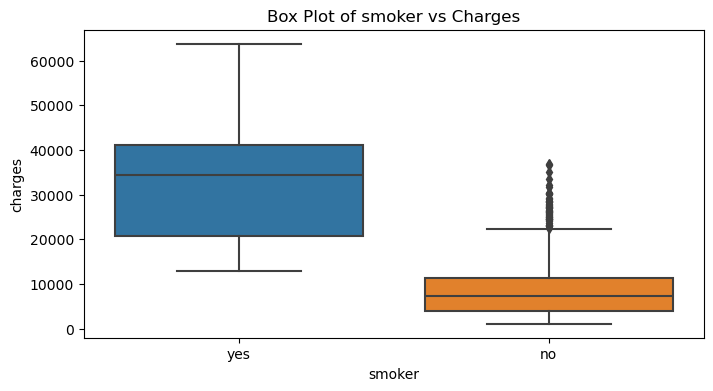

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


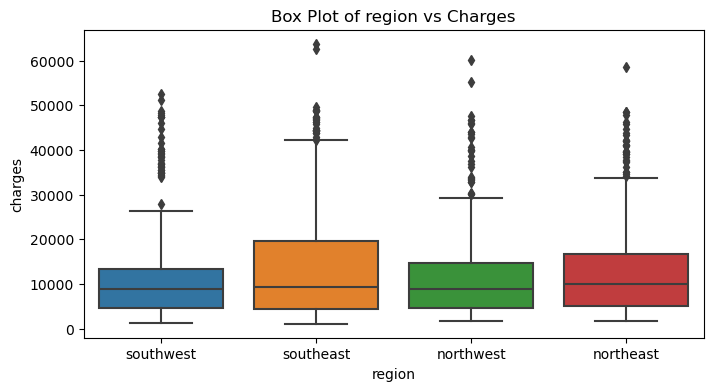

In [10]:
# Box plots for categorical vs numerical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f"Box Plot of {col} vs Charges")
    plt.show()

# Data preprocessing

In [11]:
# one hot encoding for categorical values
categorical_cols = ['sex', 'smoker', 'region']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [12]:
# feature scaling 
scaler = StandardScaler()
df_encoded[['age', 'bmi', 'children']] = scaler.fit_transform(df_encoded[['age', 'bmi', 'children']])


In [13]:
# split the data for train and test
X = df_encoded.drop(columns ='charges')
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("\nSummary of preprocessing:")
print("--------------------------")
print("Missing values after preprocessing:")
print(df_encoded.isnull().sum())
print("\nShape of encoded DataFrame:", df_encoded.shape)


Summary of preprocessing:
--------------------------
Missing values after preprocessing:
age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

Shape of encoded DataFrame: (1338, 9)


### ML model

In [15]:
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [16]:
# Predictions
y_train_pred = decision_tree_regressor.predict(X_train)
y_test_pred = decision_tree_regressor.predict(X_test)

In [17]:
# Model evaluation
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2_score= r2_score(y_train, y_train_pred)
test_r2_score= r2_score(y_test, y_test_pred)


print("Decision Tree Regression Model Evaluation:")
print("------------------------------------------")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train r2_score: {train_r2_score:.2f}")
print(f"Test r2_score: {test_r2_score:.2f}")

Decision Tree Regression Model Evaluation:
------------------------------------------
Train RMSE: 494.21
Test RMSE: 6336.72
Train MAE: 29.57
Test MAE: 3074.87
Train r2_score: 1.00
Test r2_score: 0.74


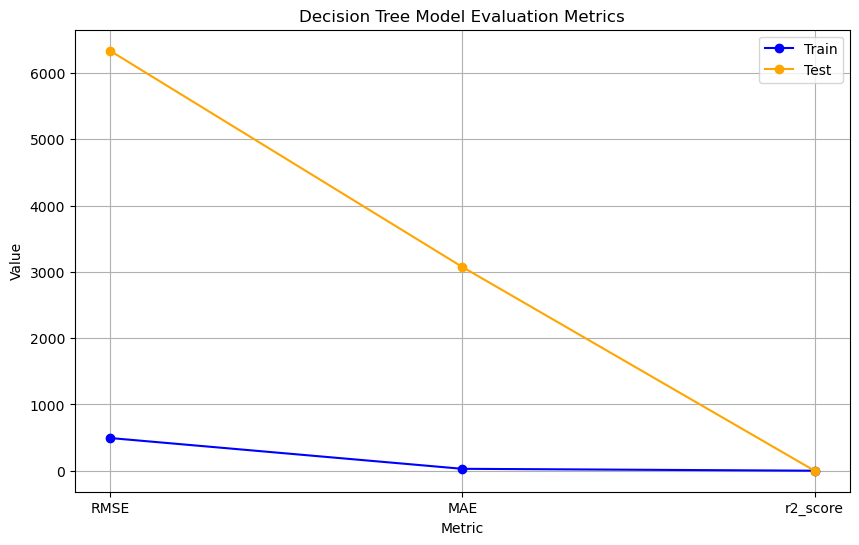

In [18]:
# Metrics
metrics = ['RMSE', 'MAE', 'r2_score']

# RMSE and MAE values for training and testing sets
train_values = [train_rmse, train_mae, train_r2_score]
test_values = [test_rmse, test_mae, test_r2_score]

# Create line chart for Decision Tree model
plt.figure(figsize=(10, 6))
plt.plot(metrics, train_values, marker='o', label='Train', color='blue')
plt.plot(metrics, test_values, marker='o', label='Test', color='orange')

plt.title('Decision Tree Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()